TODO: you shoud implment this function -> computePlotIsoContour( isovalue, color )


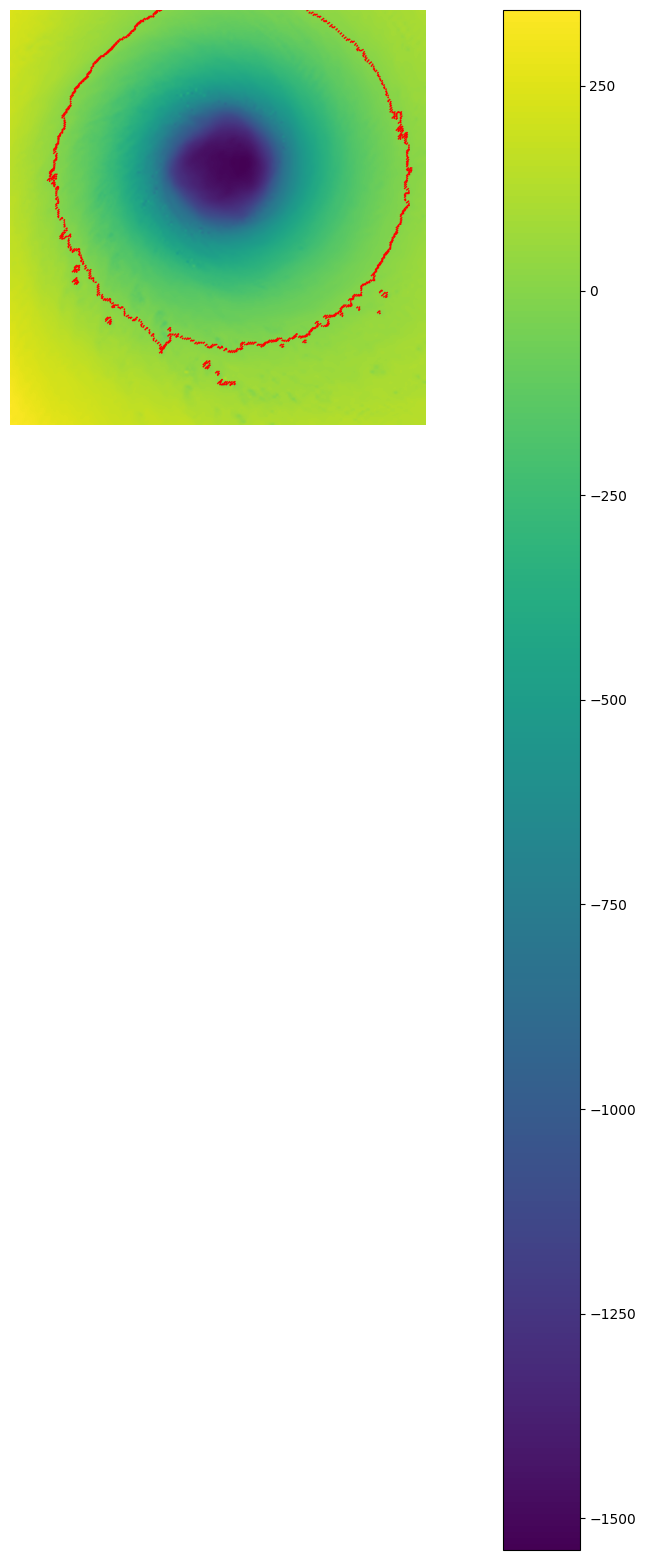

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data2D = 0
data2DPlot = 0

##### draw a line segment between [x0, y0] -> [x1, y1]. color: color of the line semgne
##### DO NOT modify this function
def plotOneEdge(x0, y0, x1, y1, color="red"):
#     plt.plot([y0*5,y1*5], [x0*5,x1*5], linewidth=1, color=color)
    plt.plot([x0*5,x1*5], [y0*5,y1*5], linewidth=1, color=color)

##### x, y: location. Return: data value at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global data2DPlot
    data2D = np.load("rawData.npy").transpose()
    data2DPlot = np.load("plotData.npy")

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    plt.imshow(data2DPlot)
    plt.colorbar()

##### (TODO) WORK on this function
#####compute and draw the isocontour of the given datavalue ("isovalue")
#####color: isocontour color
##### you should use "getDataVlue()" to get the data you want and use "plotOneEdge()" to a segment of the isocontour
##### I do not mind the computation is efficnet or not
def computePlotIsoContour( isovalue, color ):
    print("TODO: you shoud implment this function -> computePlotIsoContour( isovalue, color )")
    for x in range(0,199):
        for y in range(0,199):
            v1 = getDataValue(x,y)
            v2 = getDataValue(x,y+1)
            v3 = getDataValue(x+1,y+1)
            v4 = getDataValue(x+1,y)
            
            
            # Case 1 No intersection
            if((v1 < isovalue and v3 > isovalue) or
               (v1 > isovalue and v3 < isovalue)):
                p1 = linearInterpolation(v1,v3,y,y+1,isovalue) # x position same
                p2 = linearInterpolation(v1,v3,x,x+1,isovalue) # y position same
                plotOneEdge(x, p1, p2, y, color="red")
            
            if((v1 < isovalue and v2 > isovalue) or
               (v1 > isovalue and v2 < isovalue)):
                p1 = linearInterpolation(v1,v3,y,y+1,isovalue) # x position same
                p2 = linearInterpolation(v1,v3,y,y+1,isovalue) # x position same
                plotOneEdge(x, p1, x, p2, color="red")
            
            if((v1 < isovalue and v4 > isovalue) or
               (v1 > isovalue and v4 < isovalue)):
                p1 = linearInterpolation(v1,v4,x,x+1,isovalue) # y position same
                p2 = linearInterpolation(v1,v4,x,x+1,isovalue) # y position same
                plotOneEdge(p1, y, p2, y, color="red")
            
            
            # Case 2 Adjacent Cut Top left
            if(((v1 < isovalue and v2 > isovalue) and 
               (v1 < isovalue and v4 > isovalue)) or
               ((v1 > isovalue and v2 < isovalue) and
               (v1 > isovalue and v4 < isovalue))):
                p1 = linearInterpolation(v1,v2,y,y+1,isovalue) # x position same
                p2 = linearInterpolation(v1,v4,x,x+1,isovalue) # y position same
                plotOneEdge(x, p1, p2, y, color="red")
                
            # Case 2 Adjacent Cut Top Right
            if(((v2 < isovalue and v1 > isovalue) and 
               (v2 < isovalue and v3 > isovalue)) or
               ((v2 > isovalue and v1 < isovalue) and
               (v2 > isovalue and v3 < isovalue))):
                p1 = linearInterpolation(v2,v1,y,y+1,isovalue) # x position same
                p2 = linearInterpolation(v2,v3,x,x+1,isovalue) # y position same
                plotOneEdge(x, p1, p2, y, color="red")
            
            # Case 3 vertical Cut
            if(((v1 < isovalue and v2 > isovalue) and 
               (v4 < isovalue and v3 > isovalue)) or
               ((v1 > isovalue and v2 < isovalue) and
               (v4 > isovalue and v3 < isovalue))):
                p1 = linearInterpolation(v1,v2,x,x+1,isovalue) # y position same
                p2 = linearInterpolation(v4,v3,x,x+1,isovalue) # y position same
                plotOneEdge(p1, y, p2, y, color="red")
            
            
            # Case 3 Horizontal Cut
            if(((v1 < isovalue and v4 > isovalue) and 
               (v2 < isovalue and v3 > isovalue)) or
               ((v1 > isovalue and v4 < isovalue) and
               (v2 > isovalue and v3 < isovalue))):
                p1 = linearInterpolation(v1,v4,y,y+1,isovalue) # x position same
                p2 = linearInterpolation(v2,v3,y,y+1,isovalue) # x position same
                plotOneEdge(x, p1, x, p2, color="red")
            
        
def linearInterpolation(v1,v2,p1,p2,C):
    p = (v1-C)/(v1-v2)*(p2-p1)+p1    
    return p
            
                
    

##### main 
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(0, "red")

plt.show()